# Cat and Dog Classification

In [ ]:
# downloading data
!curl -L -f -o cat-classification-data.zip\
https://www.kaggle.com/api/v1/datasets/download/ankushhv/cat-classification-data

# unzipping data
!unzip -q -f cat-classification-data.zip

# removing the zip file
!rm cat-classification-data.zip

In [1]:
# imports
import torch
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from nn import *
from functions import *

train_fileloc = 'train_catvnoncat.h5'
test_fileloc = 'test_catvnoncat.h5'

In [2]:
def load_data(train_fileloc: str, test_fileloc: str):
    train_dataset = h5py.File(train_fileloc, "r")
    train_set_x_orig = torch.tensor(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = torch.tensor(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_fileloc, "r")
    test_set_x_orig = torch.tensor(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = torch.tensor(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_fileloc, test_fileloc)
# print(f"Train_x_orig:{train_x_orig}\nTrain_y:{train_y}\nTest_x_orig:{test_x_orig}\nTest_y:{test_y}\nClasses:{classes}")

y = tensor(0). It's a non-cat picture.


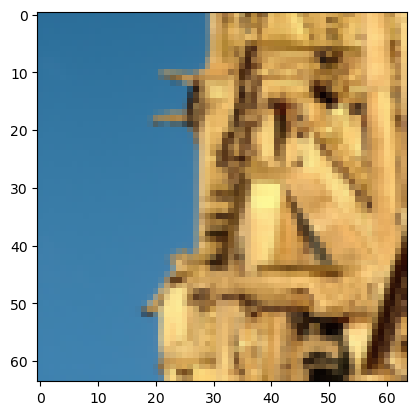

In [4]:
index = 69
plt.imshow(train_x_orig[index].cpu().numpy())
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Explore dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: torch.Size([209, 64, 64, 3])
train_y shape: torch.Size([1, 209])
test_x_orig shape: torch.Size([50, 64, 64, 3])
test_y shape: torch.Size([1, 50])


In [6]:
# Data preparation
train_x = train_x_orig.view(m_train, -1) / 255
test_x = (test_x_orig.view(m_test, -1) / 255)

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# Define the model architecture
layers_dims = [12288, 20, 7, 5, 1]  # Simplified architecture

# Create and train the model
model = NeuralNetwork(layers_dims)
costs = model.train(train_x, train_y.T, num_iterations=2500, learning_rate=0.005)

# Evaluate the model
train_accuracy = model.evaluate(train_x, train_y)
test_accuracy = model.evaluate(test_x, test_y)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

train_x's shape: torch.Size([209, 12288])
test_x's shape: torch.Size([50, 12288])


Epochs :   0%|          | 0/2500 [00:00<?, ?it/s]

Cost at iteration 0: 0.7310371398925781
Cost at iteration 100: 0.6150387525558472
Cost at iteration 200: 0.5489543080329895
Cost at iteration 300: 0.4737095534801483
Cost at iteration 400: 0.4235987961292267
Cost at iteration 500: 0.37148594856262207
Cost at iteration 600: 0.34431198239326477
Cost at iteration 700: 0.27304112911224365
Cost at iteration 800: 0.18327580392360687
Cost at iteration 900: 0.12644997239112854
Cost at iteration 1000: 0.07047855108976364
Cost at iteration 1100: 0.04647884517908096
Cost at iteration 1200: 0.03383207693696022
Cost at iteration 1300: 0.026004081591963768
Cost at iteration 1400: 0.020593415945768356
Cost at iteration 1500: 0.016791095957159996
Cost at iteration 1600: 0.013975702226161957
Cost at iteration 1700: 0.011860432103276253
Cost at iteration 1800: 0.010230588726699352
Cost at iteration 1900: 0.008943138644099236
Cost at iteration 2000: 0.007895386777818203
Cost at iteration 2100: 0.007043333258479834
Cost at iteration 2200: 0.00633432902395

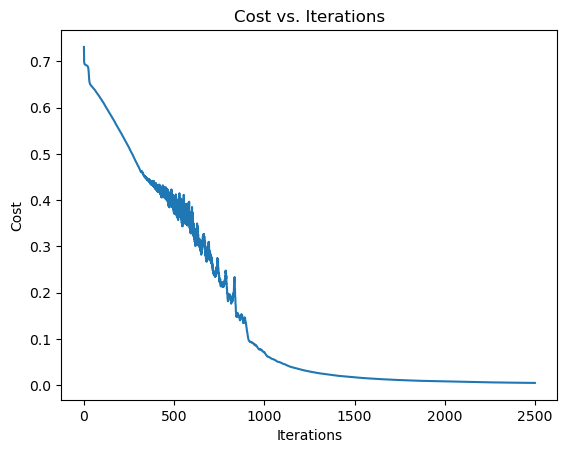

In [7]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [8]:
train_accuracy = model.evaluate(train_x, train_y)
test_accuracy = model.evaluate(test_x, test_y)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 1.0000
Test accuracy: 0.7800


# Training Model on GPU

Device: mps


Epochs :   0%|          | 0/1000 [00:00<?, ?it/s]

Cost at iteration 0: 0.6973170042037964
Cost at iteration 100: 0.6439858078956604
Cost at iteration 200: 0.6284421682357788
Cost at iteration 300: 0.5969724059104919
Cost at iteration 400: 0.5477586388587952
Cost at iteration 500: 0.4856284558773041
Cost at iteration 600: 0.44497743248939514
Cost at iteration 700: 0.38950949907302856
Cost at iteration 800: 0.5393614768981934
Cost at iteration 900: 0.23312728106975555
Cost at iteration 999: 0.2230568826198578
Train accuracy: 0.8708
Test accuracy: 0.6200


Text(0, 0.5, 'Cost')

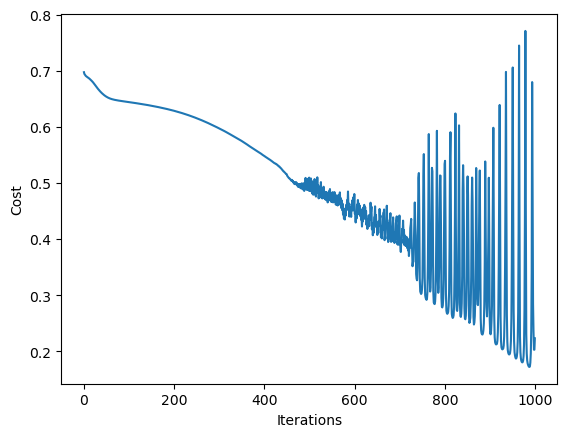

In [9]:
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

gpu_model = NeuralNetwork(layers_dims).to(device)
costs = gpu_model.train(train_x.to(device), train_y.T.to(device), num_iterations=1000, learning_rate=0.01)

train_accuracy = gpu_model.evaluate(train_x.to(device), train_y.to(device))
test_accuracy = gpu_model.evaluate(test_x.to(device), test_y.to(device))
                                   
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Test Model on Random images

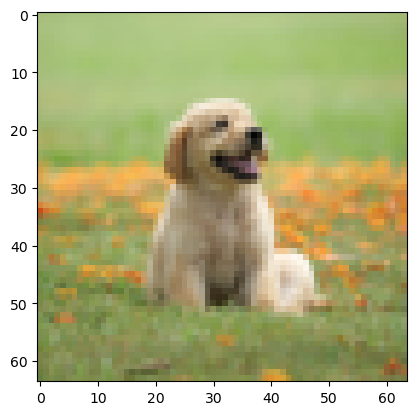

In [10]:
fname = "../images/Dog.jpg"
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)

In [11]:
image = image / 255.
image = image.reshape((1, num_px * num_px * 3))
image_tensor = torch.tensor(image, dtype=torch.float32)

my_predicted_image = gpu_model.predict(image_tensor.to(device))
print(my_predicted_image)
predicted_class = 1 if my_predicted_image > 0.5 else 0

print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[predicted_class].decode("utf-8") +  "\" picture.")

tensor([[0.0006]], device='mps:0')
y = tensor(0.0006, device='mps:0'), your L-layer model predicts a "non-cat" picture.
